**TASK 1:**

**Using Linear Regression to predict the scores of a student depending upon his/her number of study hours.**

Concept of Linear Regression- **y=mx+b**

LR basically fits multiple points on the data line and returns the line that results in the least error.

In [60]:
# Importing the required libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

#   **Body**:- 

In [61]:
url= "http://bit.ly/w-data"
data = pd.read_csv(url) ##Data importing is complete
print(data.shape) #We are printing the rows and columns
data.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


For better understanding we will visualize it in 2-D graph



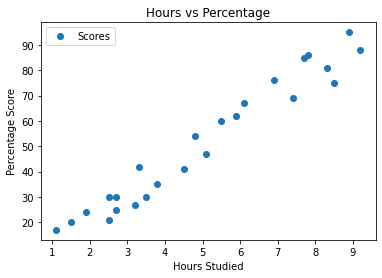

In [56]:
## Plotting the score graph
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Preparing  the Data**

We split the data into **Attributes**(independent variable) and **labels**(dependent variable:- which will be predicted)


In [22]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Further splitting the data into Training and Testing sets(80% and 20%)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=0)

**Training the data**

In [63]:
from sklearn.linear_model import LinearRegression
case = LinearRegression()
case.fit(X_train,y_train) #inbuilt function of skikit lear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

2.018160041434662
[9.91065648]


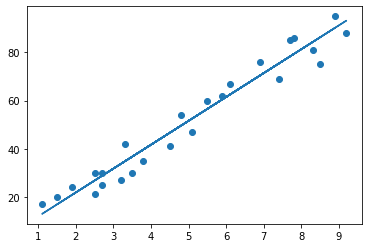

In [59]:
#Plotting the regression graph
print(case.intercept_) #intercept
print(case.coef_) #slope
line = case.coef_*X+case.intercept_#y=mx+b

#plotting for test data
plt.scatter(X,y)
plt.plot(X, line)
plt.show()

**Making Predictions:-**

We use test data and see how accurately our algorithm is working and predicting the test score

In [65]:
print(X_test) #Testing data - In hours
y_prediction = case.predict(X_test) #Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [66]:
#the actual data set:- 
df = pd.DataFrame({'Actual':y_test,'Predicted':y_prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [67]:
#Testing with our own data
hours=9.25
own_prediction = case.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the algorithum**

We can evaluate using: Mean Absoulte Error (MAE).Mean Squared Error (MSE), Root Mean Square Error (RMSE)

In [68]:
from sklearn import metrics as m
print('Mean Absolute Error:',m.mean_absolute_error(y_test,y_prediction))
print('Mean Squared Error:',m.mean_squared_error(y_test,y_prediction))
print('Root Squared Error:',np.sqrt(m.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Squared Error: 4.647447612100373
